
---
# 데이터 전처리
---


<핵심 키워드>
* 데이터 전처리
* 표준점수
* 브로드캐스팅
---

## [데이터 전처리]

### 1. 수상한 샘플
* 앞서 02-1에서 만든 모델을 기반으로 길이가 25cmm이고 무게가150g인 도미 샘플을 잘 예측하는지 확인해본다.
* sklaern의 모델들은 훈련과 테스트에 필요한 공통적인 함수들을 내포하고 있다.<br>
 - fit() &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;: 모델을 훈련시키는 함수
 - score() &nbsp;&nbsp;: 모델의 테스트 점수를 메기는 함수
 - predict() : 임의의 샘플(들)을 주었을 때 모델이 예측한 결과를 보여주는 함수

#### 1-1. sklearn으로 훈련 세트와 테스트 세트 나누기
* sklearn의 model_selection 모듈 내의 train_test_split()함수는<br>
훈련 데이터를 주면 훈련 세트와 테스트 세트를 랜덤하게 자동으로 나눠주는 기능을 한다.


《도미와 빙어 데이터 준비》

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

《특성과 타겟 데이터로 나누기》

In [ ]:
import numpy as np
fish_data   = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

《훈련 세트와 테스트 세트 생성》

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

#잘 섞엿는지 형태 확인
print("train_input :",train_input.shape)
print("train_target :",train_target.shape)
print("test_input :",test_input.shape)
print("test_target :",test_target.shape)

train_input : (36, 2)
train_target : (36,)
test_input : (13, 2)
test_target : (13,)


《모델 훈련》

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

《[25, 150]인 도미 예측하기》

In [ ]:
#1은 도미, 0은 빙어
print(kn.predict([[25, 150]]))

[0.]


#### 1-2. 수상한 도미 한 마리
* 훈련한 모델은 길이가 25cm이고 무게가 150인 도미 샘플을 빙어로 잘못 측정했다.
* 우선 [25, 150]인 도미를 포함하여 생선 샘플들을 무게-길이 산점도로 나타내본다
* 이때 KNeighborsClassifier 클래스의 kneighbors()함수를 이용하여 [25, 150]<br>
인 도미의 최근접 이웃 5개를 같이 나타내고 각각의 거리도 알아본다.
 - 여기서 나타낼 최근접 이웃의 개수는 KNeighvorsClassifier의 n_neighbors<br>
 특성으로 지정할 수 있다. default value 는 5이다.



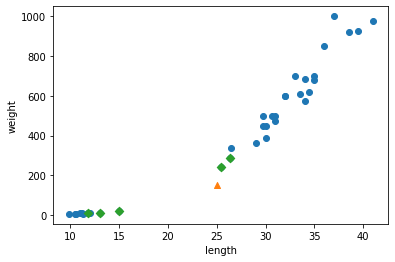

In [ ]:
import matplotlib.pyplot as plt
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
#[25, 150]도미는 삼각형으로 나타냄
plt.scatter(25, 150, marker='^')
#[25, 150]도미의 최근접 이웃 5개는 마름모로 나타냄
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

《[25, 150]도미 샘플의 최근접 이웃 5개의 거리 출력》

In [ ]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]



### 2. 데이터 전처리
* 삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리는 92이고,<br>
그 외의 가장 가까운 샘플들은 모두 130, 138이다. 그런데 어림짐작으로<br>
보아도 92의 거리보다 족히 몇 배는 되어 보인다.
* 이는 x(길이)축과 y(무게)축의 범위(scale)이 달라서 나타나는 현상이다.
* 샘플들 간의 거리에 y(무게)값이 x(길이)보다 훨씬 더 많은 영향을 끼친다.
* 그렇다면 이번에는 x축과 y축의 범위를 갖게하여 산점도를 그려보자.

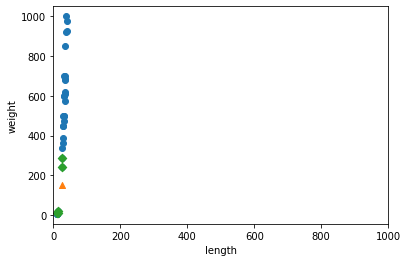

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 2-1 기준을 맞춰라
* 이와 같이 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.
* KNeighborsClassifier와 같은 알고리즘은 샘플 간의 거리에 영향을 많이 받는다.
* 따라서 특성값을 일정한 기준으로 맞춰서 사용해야 하는데, 이 과정을 <br>
  **데이터 전처리**(preprocessing)라고 부른다.

#### 2-2 표준점수(standard score)
* 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.
* 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건을로 비교할 수 있다.
* 표준 점수는 특성값에서 평균을 빼고 표준편차로 나누어 주면 된다.<br><br>
 &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp;  &nbsp; 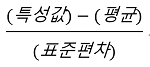<br>

《두 특성(길이와 무게)의 표준 점수 구하기》

In [ ]:
#행을 따라 각 열(특성)마다 평균, 표준 편차를 내야 함
mean = np.mean(train_input, axis = 0)
std  = np.std(train_input, axis = 0)
print(mean, std)
#표준 점수
train_scaled = (train_input - mean)/std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


#### 2-3 표준점수(standard score)로 다시 훈련 후, 재평가
* 주의할 점: 반드시 훈련 세트의 표준점수를 기준으로 테스트 세트, 샘플
의 통계값(특성 데이터)을 변형 시켜야 함
* 그럼 전처리한 데이터로 다시 모델을


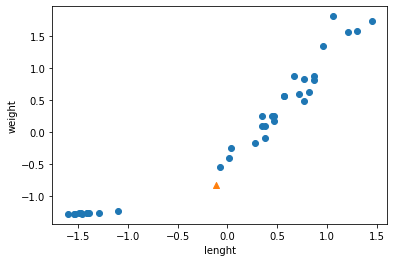

In [ ]:
#[25, 150] 생선 데이터 전처리
new = ([25, 150] - mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

《전처리 데이터로 모델 훈련하기》

In [ ]:
kn.fit(train_scaled, train_target)
#test_target 전처리
test_scaled = (test_input - mean)/std
#전처리 데이터로 평가
kn.score(test_scaled, test_target)

1.0

《전처리 데이터로 훈련한 모델의 [25, 150]도미 데이터 예측 》

In [ ]:
kn.predict([new])

array([1.])

#### 2-4 전처리된 데이터의 산점도
* 전처리된 데이터를 학습한 모델이 이번에는 [25, 150]인 도미를 잘 예측하였다.
* 그렇다면 최근접 이웃은 어떤 변화가 있을지 산점도로 살펴보자.


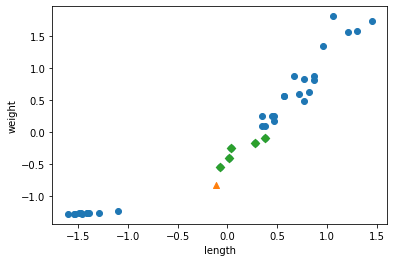

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 결과적으로 특성값의 스케일에 민감하지 않고 안정적인 예측을 할<br>
수 있는 모델을 만들었다.